#### [ Fashion MNIST 실습 ]

##### [1] 데이터 준비 및 확인
[1-1] 데이터 로딩

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

import numpy as np

In [3]:
np.set_printoptions(floatmode='fixed', suppress=True)

In [4]:
(X_tr, y_tr), (X_te, y_te) = load_data()

In [5]:
X_tr.shape, y_tr.shape, X_te.shape, y_te.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

[1-2] 데이터 전처리
- 픽셀값 0 ~ 255 --> 0.0 ~ 1.0

In [6]:
X_tr = X_tr / X_tr.max()

In [7]:
X_te = X_te / X_te.max()

##### [2] 모델 생성

[2-1] 모델 설계

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [9]:
model = Sequential(name='My_model')

In [10]:
# 입력층
model.add(Flatten(input_shape=(28, 28)))

In [11]:
# 은닉층
model.add(Dense(50, activation='relu'))

In [12]:
# 출력층
model.add(Dense(10,
                activation='softmax'))

In [13]:
model.summary()

Model: "My_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


[2-2] 모델 설계

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics='acc')

##### [3] 학습

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
from datetime import datetime

In [17]:
FILEPATH = f'./save_model_{datetime.now().ctime()}.ckp'

In [18]:
modelCB = ModelCheckpoint(filepath=FILEPATH, monitor='val_accuracy', save_best_only=True)

In [19]:
stopCB = EarlyStopping(monitor='val_accuracy', patience=2)

In [20]:
model.fit(X_tr, y_tr,
          epochs=10,
          validation_split=0.2,
          callbacks=[modelCB, stopCB])

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5518 - acc: 0.8078 - val_loss: 0.4962 - val_acc: 0.8211
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4117 - acc: 0.8522 - val_loss: 0.4324 - val_acc: 0.8436
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3734 - acc: 0.8660 - val_loss: 0.3920 - val_acc: 0.8658
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3521 - acc: 0.8738 - val_loss: 0.3971 - val_acc: 0.8651
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3380 - acc: 0.8786 - val_loss: 0.3604 - val_acc: 0.8724
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3253 - acc: 0.8845 - val_loss: 0.3636 - val_acc: 0.8733
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3163 - acc: 0.8880 - val_loss: 0.3835 - val_acc: 0.8713
Epoch 8/10
1500/1500 [==============================] - 2s 1ms

### =============================================================================

In [85]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [86]:
fashion_mnist = keras.datasets.fashion_mnist

In [87]:
(X_tr, y_tr), (X_te, y_te) = fashion_mnist.load_data()

In [88]:
X_tr.shape

(60000, 28, 28)

In [89]:
y_tr.shape

(60000,)

In [90]:
y_tr

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [91]:
X_val, X_tr = X_tr[:5000] / 255., X_tr[5000:] / 255.
y_val, y_tr = y_tr[:5000], y_tr[5000:]
X_te = X_te / 255.

In [92]:
X_tr[0].shape

(28, 28)

In [93]:
X_tr

array([[[0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        ...,
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000]],

       [[0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        ...,
        [0.00000000, 0.00000000, 0.00000000, ..., 0.00000000,
         0.00000000, 0.00000000],
        [0.0

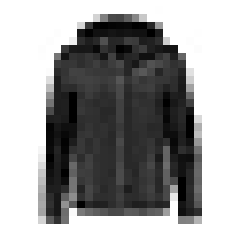

In [29]:
plt.imshow(X_tr[0], cmap='binary')
plt.axis('off')
plt.show()

In [30]:
y_tr

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [33]:
model.layers

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
X_tr[:1, :, :].shape

(1, 28, 28)

In [36]:
flattend = model.get_layer(index=0)(X_tr[:1, :, :])
flattend.shape

TensorShape([1, 784])

In [37]:
output1 = model.layers[1](flattend)
output1.shape

TensorShape([1, 300])

In [38]:
output2 = model.layers[2](output1)
output2.shape

TensorShape([1, 100])

In [39]:
# 마지막 dense layer 를 통과하면 최종 출력은 10개의 값
output3 = model.layers[3](output2)
output3

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.12987210, 0.03252400, 0.21425821, 0.13287789, 0.10925955,
        0.03510861, 0.07772137, 0.15131408, 0.04955889, 0.06750521]],
      dtype=float32)>

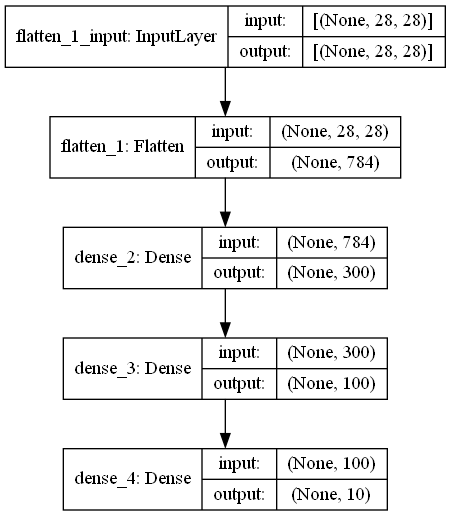

In [40]:
keras.utils.plot_model(model, 'My_fashion_mnist_model.png', show_shapes=True)

In [41]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [42]:
# 신경망 훈련
history = model.fit(X_tr, y_tr, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7252 - accuracy: 0.7606 - val_loss: 0.5021 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4899 - accuracy: 0.8301 - val_loss: 0.4392 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4452 - accuracy: 0.8442 - val_loss: 0.4202 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4179 - accuracy: 0.8546 - val_loss: 0.4080 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3969 - accuracy: 0.8615 - val_loss: 0.3943 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8665 - val_loss: 0.3892 - val_accuracy: 0.8636
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8698 - val_loss: 0.3553 - val_accuracy:

In [44]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.725172,0.760582,0.502077,0.8288
1,0.489902,0.830055,0.439208,0.8512
2,0.445155,0.844164,0.420166,0.8570
3,0.417869,0.854600,0.408045,0.8640
4,0.396946,0.861473,0.394343,0.8664
5,0.380564,0.866473,0.389206,0.8636
6,0.368156,0.869764,0.355276,0.8786
7,0.354645,0.874782,0.351254,0.8778
8,0.345532,0.876382,0.343516,0.8796
9,0.335019,0.880236,0.365575,0.8718


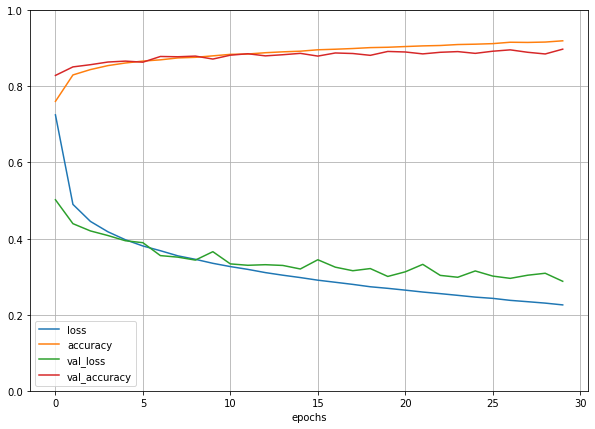

In [48]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('epochs')
plt.show()

In [49]:
model.evaluate(X_te, y_te)

313/313 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8840


[0.326862633228302, 0.8840000033378601]

In [50]:
X_te[0]

array([[0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000],
       [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000],
       [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.0000

In [55]:
X_new = X_te[:3]
X_new.shape

(3, 28, 28)

In [56]:
X_new[2]

array([[0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00392157, 0.00000000,
        0.26274510, 0.69411765, 0.50588235, 0.60000000, 0.45882353,
        0.50588235, 0.57254902, 0.55294118, 0.68627451, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000],
       [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00784314, 0.00000000,
        0.76862745, 1.00000000, 1.00000000, 1.00000000, 0.94509804,
        0.98431373, 1.00000000, 0.96078431, 1.00000000, 0.29803922,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000],
       [0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.95294118, 0.92941176, 0.85098039, 0.89411765, 0.90588235,
        0.87058824, 0.8549

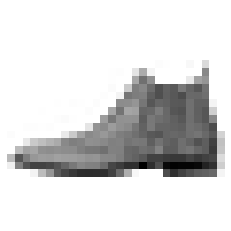

In [53]:
plt.imshow(X_new[0], cmap='binary')
plt.axis('off')
plt.show()

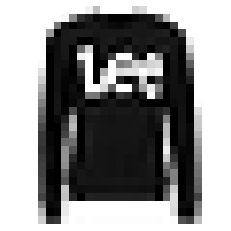

In [57]:
plt.imshow(X_new[1], cmap='binary')
plt.axis('off')
plt.show()

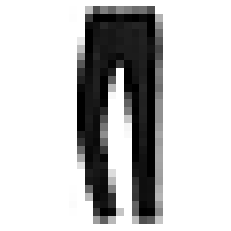

In [63]:
plt.imshow(X_new[2], cmap='binary')
plt.axis('off')
plt.show()

In [59]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.02000000, 0.00000000, 0.98000002],
       [0.00000000, 0.00000000, 1.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000],
       [0.00000000, 1.00000000, 0.00000000, 0.00000000, 0.00000000,
        0.00000000, 0.00000000, 0.00000000, 0.00000000, 0.00000000]],
      dtype=float32)

In [60]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [61]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

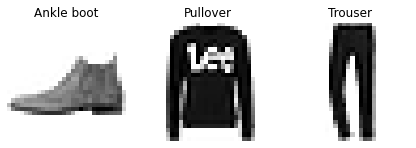

In [65]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    #                                  축 위치 간격 보정
    plt.axis('off')
    plt.title(class_names[y_te[index]], fontsize=12)

# subplot 간격 조절
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### ✔️새로운 이미지 넣어서 예측하기

In [67]:
from PIL import Image
import os

In [113]:
sample_folder_path = r'.\image'
file_list = os.listdir(sample_folder_path)

In [114]:
file_list

['bag.jfif']

In [115]:
file_path = os.path.join(sample_folder_path, file_list[0])

In [116]:
img = Image.open(file_path)

In [117]:
img = img.resize((28, 28))

In [118]:
# 흑백으로 변경
img = img.convert('L')

In [119]:
img

In [120]:
img_array = np.array(img)

In [123]:
img_array = np.invert(img_array)

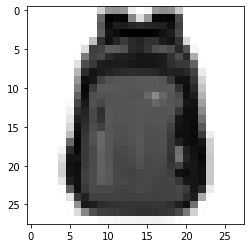

In [124]:
plt.imshow(img_array, cmap='binary')
plt.show()

In [125]:
img.close()

In [126]:
img_array = img_array.astype(float) / 255

In [127]:
flattend_arr = img_array.flatten()

In [130]:
y_pre = model.predict(flattend_arr.reshape(-1, 784))

In [131]:
y_pre.argmax()

4